# Library

In [1]:
!pip install nltk emoji unidecode Sastrawi wordcloud matplotlib wordsegment

import pandas as pd
import re
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('punkt', quiet=True)
import nltk
from collections import Counter
import itertools





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 72.5 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Preprocessing

In [2]:
slang_dict = {
    "bgt": "banget",
    "bngt": "banget",
    "mantab" : "mantap",
    "yg": "yang",
    "gak": "tidak",
    "ga": "tidak",
    "gk": "tidak",
    "nggak": "tidak",
    "ngg": "tidak",
    "gaada": "tidak ada",
    "gada": "tidak ada",
    "tdk": "tidak",
    "kaga": "tidak",
    "kagak": "tidak",
    "jgn": "jangan",
    "jg": "juga",
    "trs": "terus",
    "tp": "tapi",
    "tpi": "tapi",
    "cuman": "cuma",
    "cm": "cuma",
    "cmn": "cuma",
    "banget": "sangat",
    "bgt": "sangat",
    "bngt": "sangat",
    "bangett": "sangat",
    "bangettt": "sangat",
    "bangetttt": "sangat",
    "bgtt": "sangat",
    "bnget": "sangat",
    "bnget": "sangat",
    "bangat": "sangat",
    "dpt": "dapat",
    "dapet": "dapat",
    "dpet": "dapat",
    "bs": "bisa",
    "bisa": "bisa",
    "bsa": "bisa",
    "bisa": "bisa",
    "gmn": "bagaimana",
    "gimana": "bagaimana",
    "gmana": "bagaimana",
    "sdh": "sudah",
    "udh": "sudah",
    "udah": "sudah",
    "uda": "sudah",
    "blm": "belum",
    "belom": "belum",
    "blom": "belum",
    "sm": "sama",
    "sma": "sama",
    "dgn": "dengan",
    "dg": "dengan",
    "dngn": "dengan",
    "pd": "pada",
    "pdhl": "padahal",
    "pdhal": "padahal",
    "pdahal": "padahal",
    "pdhl": "padahal",
    "skrg": "sekarang",
    "skrng": "sekarang",
    "skr": "sekarang",
    "skrang": "sekarang",
    "dri": "dari",
    "dr": "dari",
    "drpada": "daripada",
    "klo": "kalau",
    "kl": "kalau",
    "kalo": "kalau",
    "klw": "kalau",
    "klau": "kalau",
    "kalu": "kalau",
    "dlm": "dalam",
    "dl": "dalam",
    "dlmn": "dalam",
    "utk": "untuk",
    "untk": "untuk",
    "untuk": "untuk",
    "utuk": "untuk",
    "yg": "yang",
    "yng": "yang",
    "y": "yang",
    "yg": "yang",
    "aja": "saja",
    "aj": "saja",
    "aja": "saja",
    "ajah": "saja",
    "ajja": "saja",
    "ajaa": "saja",
    "gpp": "tidak apa-apa",
    "gapapa": "tidak apa-apa",
    "ga papa": "tidak apa-apa",
    "gapa": "tidak apa-apa",
    "gpapa": "tidak apa-apa",
    "sih": "sih",
    "dong": "dong",
    "deh": "deh",
    "dah": "sudah",
    "nih": "ini",
    "nii": "ini",
    "ny": "nya",
    "nya": "nya",
    "nyh": "nya",
    "nyah": "nya",
    "nyaa": "nya",
    "ny": "nya",
    "ny": "nya",
    "ni": "ini",
    "nih": "ini",
    "nii": "ini",
    "n": "dan",
    "dan": "dan",
    "d": "di",
    "di": "di",
    "dii": "di",
    "dii": "di",
    "dii": "di",
    "ke": "ke",
    "k": "ke",
    "k": "ke",
    "k": "ke",
    "ya": "iya",
    "iya": "iya",
    "y": "iya",
    "y": "iya",
    "y": "iya",
    "ok": "oke",
    "oke": "oke",
    "okey": "oke",
    "okee": "oke",
    "okeee": "oke",
    "bagus": "bagus",
    "baguss": "bagus",
    "bagusss": "bagus",
    "bagussss": "bagus",
    "bagusssss": "bagus",
    "bagussssss": "bagus",
    "bagusssssss": "bagus",
    "mantap": "mantap",
    "mantapp": "mantap",
    "mantappp": "mantap",
    "mantapppp": "mantap",
    "mantab": "mantap",
    "mantabs": "mantap",
    "mantul": "mantap",
    "mantull": "mantap",
    "mantull": "mantap",
    "seru": "seru",
    "seruu": "seru",
    "seruuu": "seru",
    "seruuuu": "seru",
    "seruuuuu": "seru",
    "sru": "seru",
    "sruu": "seru",
    "sruuu": "seru",
    "bagus": "bagus",
    "keren": "keren",
    "kren": "keren",
    "kereen": "keren",
    "kereenn": "keren",
    "kereennn": "keren",
    "kerenn": "keren",
    "kerennn": "keren",
    "kerennnn": "keren",
    "film": "film",
    "flm": "film",
    "filem": "film",
    "filim": "film",
    "flim": "film",
    "drama": "drama",
    "dram": "drama",
    "dramaa": "drama",
    "dramaaa": "drama",
    "dramaaaa": "drama",
    "nonton": "nonton",
    "nnton": "nonton",
    "nntn": "nonton",
    "nontonn": "nonton",
    "nontonnn": "nonton",
    "nontonnnn": "nonton",
    "gratis": "gratis",
    "gratiss": "gratis",
    "gratisss": "gratis",
    "gratissss": "gratis",
    "iklan": "iklan",
    "ikl": "iklan",
    "iklannya": "iklan",
    "iklannya": "iklan",
    "iklannya": "iklan",
    "saldo": "saldo",
    "sldo": "saldo",
    "saldoo": "saldo",
    "saldooo": "saldo",
    "koin": "koin",
    "koinnya": "koin",
    "koinny": "koin",
    "koinn": "koin",
    "koinnn": "koin",
    "uang": "uang",
    "duit": "uang",
    "uangnya": "uang",
    "duitnya": "uang",
    "rupiah": "rupiah",
    "rp": "rupiah",
    "ribu": "ribu",
    "rb": "ribu",
    "rbu": "ribu",
    "rbuu": "ribu",
    "sanggat" : "sangat",
    'ak' : 'aku',
    'aq' :'aku',
    'trus': 'terus',
    'jd' : 'jadi',
    'jdi' : 'jadi',
    'muas' : 'puas',
    'sy' : 'saya',
    'lg' : 'lagi',
    'lgi' : 'lagi',
    'nice' : 'bagus',
    'good' : 'bagus',
    'coin' : 'koin',
    'bnyk' : 'banyak',
    'knp' : 'kenapa',
    'app' : 'aplikasi',
    'apk' : 'aplikasi',
    'appl' : 'aplikasi',
    'aplik' : 'aplikasi',
    'yaa' : 'iya',
    'yaaa' : 'iya',
    'yaaaa' : 'iya',
    'yaaaaa' : 'iya',
    'moga' : 'semoga',
    'bgus' : 'bagus',
    'bagu' : 'bagus',
    'asyik' : 'asik',
    'tarik' : 'menarik',
    'ak' : 'aku',
    'ama' : 'sama',
    'dr' : 'dari',
    'dri' : 'dari',
    'trnfer' : 'transfer',
    'bgs' : 'bagus',
    'kayak' : 'seperti',
    'ky' : 'seperti',
    'kek' :'seperti',
    'kyk' : 'seperti',
    'bingit' : 'sangat',
    'kren' : 'keren',
    'dramany' : 'dramanya',
    'lahh' : 'lah',
    'muas' : 'puas',
    'top' : 'mantap',
    'gak' : 'tidak',
    'ga' : 'tidak',
    'gk' : 'tidak',
    'brenti' : 'berhenti',
    'wlp' : 'walaupun',
    'its ok' : 'oke',
    'gk' : 'tidak',
    'buuagus' : 'bagus',
    'masak' : 'masa',
    'klu' : 'kalau',
    'udh' : 'udah',
    'enggk' : 'tidak',
    'sanhat': 'sangat',
    'mantul' : 'mantap',
    'vidio' : 'video',
    'gratiss' : 'gratis',
    'janggann' : 'jangan',
    'iklann' : 'iklan',
    'ksini' : 'kesini',
    'bgus' : 'bagus',
    'asikk' : 'asik',
    'gud' : 'good',
    'pern' : 'pernah',
    'ngeleg' : 'ngelag',
    'asay' : 'saya',
    'buuagus' : 'bagus',
    'susa' : 'susah',
    'tdk ada' : 'tidak ada',
    'gread' : 'bagus',
    'ak' : 'aku',

}

In [3]:
stop_factory = StopWordRemoverFactory()
default_stop_words = stop_factory.get_stop_words()

custom_stop_words = [
    "yang", "untuk", "pada", "ke", "para", "namun", "menurut", "antara", "dia",
    "dua", "iya", "seperti", "jika", "sehingga", "kembali", "dan","ini",
    "karena", "kepada", "oleh", "saat", "harus", "sementara", "setelah",
    "belum", "kami", "sekitar", "bagi", "serta", "di", "dari", "telah",
    "sebagai", "masih", "hal", "ketika", "adalah", "itu", "dalam", "bisa",
    "bahwa", "atau", "hanya", "kita", "dengan", "akan", "juga", "ada",
    "mereka", "sudah", "saya", "terlalu", "akan", "dan", "di", "dari",
    "ini", "itu", "pada", "untuk", "dengan", "oleh", "saat", "harus", "sementara",
    "setelah", 'terus', 'kenapa', 'melolo', 'apa', 'pa', 'deh', 'sih', 'lah', 'nya',
    'jumat', 'poko', 'pas', 'tari', 'aku', 'gitu', 'tuh','aja', 'plm', 'tau', 'min'
    'tari', 'lah', 'pokok', 'min', 'saya', 'tuk', 'kalau', 'iqiyi'
]

stop_words = set(default_stop_words + custom_stop_words)

stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

In [4]:
def preprocess_text(text):
    if not isinstance(text, str):
        return ""

    # 1. Case Folding
    text = text.lower()

    # 2. Slang Normalization
    words = text.split()
    normalized_words = []
    for word in words:
        if word in slang_dict:
            normalized_words.append(slang_dict[word])
        else:
            normalized_words.append(word)
    text = ' '.join(normalized_words)

    # 3. Cleaning (hapus angka, tanda baca, karakter khusus)
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # 4. Stopword Removal
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Stemming
    text = ' '.join([stemmer.stem(word) for word in tokens])

    # 6. Remove short words (e.g., words with 2 or fewer characters)
    tokens = text.split()
    tokens = [word for word in tokens if len(word) > 2]
    text = ' '.join(tokens)

    return text

In [8]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/mini project/iqiyi_final.csv')

df = pd.DataFrame(data)

df['teks_clean'] = df['content'].apply(preprocess_text)

print("\n=== Dataset setelah preprocessing ===")
print(f"Jumlah baris: {len(df)}")
print("\n5 baris pertama:")
print(df[['content', 'teks_clean']].head())

print("\n=== Contoh perbandingan teks asli vs hasil preprocessing ===")
for i in range(min(3, len(df))):
    print(f"\nContoh {i+1}:")
    print(f"Original: {df['content'].iloc[i][:100]}...")
    print(f"Cleaned: {df['teks_clean'].iloc[i]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

=== Dataset setelah preprocessing ===
Jumlah baris: 3000

5 baris pertama:
                                             content  \
0  bagus tapi saya kurang puas dengan adanya yang...   
1                                              keren   
2                                              sepuh   
3  sukaa bangett sama drama' nya,apalagi iklannya...   
4                                             seru 👍   

                                          teks_clean  
0                          bagus kurang puas ada vip  
1                                              keren  
2                                              sepuh  
3  sukaa sangat sama drama iklan turut banyak app...  
4                                               seru  

=== Contoh perbandingan teks asli vs hasil preprocessing ===

Contoh 1:
Original: bagus tapi saya kurang puas dengan adanya yan

In [9]:
df['teks_clean'] = df['content'].apply(preprocess_text)

In [10]:
df.to_csv("iqiyi_final.csv", index=False)

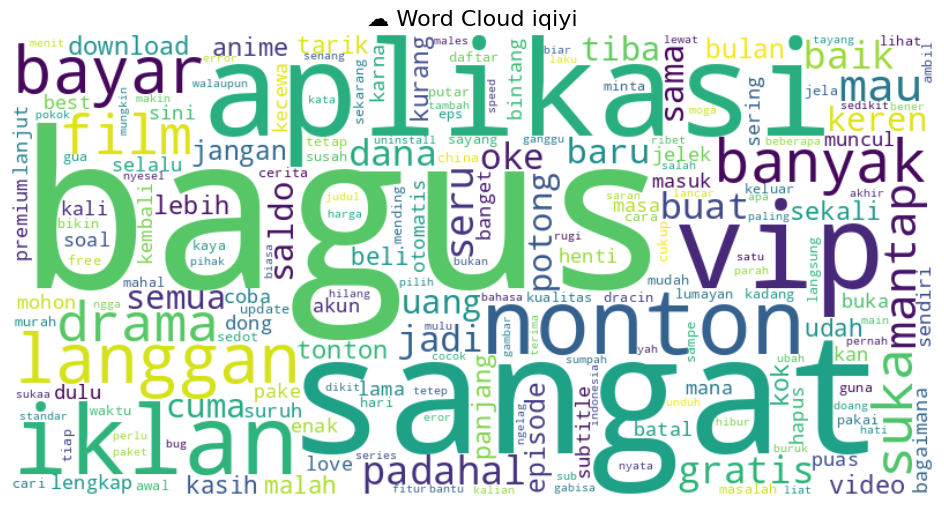

In [11]:
text = ' '.join(df['teks_clean'])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200,
    collocations=False
).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("☁️ Word Cloud iqiyi", fontsize=16)
plt.show()


# Pelabelan Sentimen

In [12]:
def categorize_sentiment(score):
    if score in [4, 5]:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    elif score in [1, 2]:
        return 'Negative'

df['sentiment'] = df['score'].apply(categorize_sentiment)

print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())
print("\nSentiment Distribution (%):")
print(df['sentiment'].value_counts(normalize=True) * 100)


Sentiment Distribution:
sentiment
Positive    2106
Negative     734
Neutral      160
Name: count, dtype: int64

Sentiment Distribution (%):
sentiment
Positive    70.200000
Negative    24.466667
Neutral      5.333333
Name: proportion, dtype: float64


In [13]:
df.to_csv("iqiyi_final.csv", index=False)

# Analisis Distribusi Sentimen

In [14]:
lexicon_positive = [
    'baik', 'bagus', 'senang', 'puas', 'mantap', 'hebat', 'cepat', 'mudah',
    'nyaman', 'keren', 'suka', 'recommended', 'terbaik', 'menarik', 'good',
    'seru', 'gratis', 'baik', 'hibur', 'best', 'love', 'alhamdulillah',
    'lancar', 'cuan', 'hebat', 'enak', 'oke' 'menarik', 'asik', 'unik', 'cocok',
    'santai', 'positif', 'memuaskan',

]

lexicon_negative = [
    'buruk', 'jelek', 'kecewa', 'lambat', 'sulit', 'error', 'parah',
    'mahal', 'lemot', 'benci', 'gagal', 'menyebalkan', 'bug', 'ngebug', 'bohong',
    'buruk', 'susah', 'sulit', 'ribet', 'masalah', 'kecewa', 'susah', 'rugi', 'penipu',
    'hoax', 'judi', 'slot', 'judol', 'ribet', 'lag', 'taik', 'hilang', ''
]


In [15]:
def lexicon_sentiment(text):
    score = 0
    words = text.split()

    for word in words:
        if word in lexicon_positive:
            score += 1
        elif word in lexicon_negative:
            score -= 1

    if score > 0:
        return "positif"
    elif score < 0:
        return "negatif"
    else:
        return "netral"


In [16]:
df["lexicon"] = df["teks_clean"].astype(str).apply(lexicon_sentiment)

df.head()


,reviewId,userName,content,score,at,content_casefold,content_preprocessed,teks_clean,sentiment,lexicon
0,401686bc-bb77-459a-a383-c547f520611a,Pengguna Google,bagus tapi saya kurang puas dengan adanya yang...,4,2025-12-28 09:45:49,bagus tapi saya kurang puas dengan adanya yang...,"['bagus', 'tapi', 'saya', 'kurang', 'puas', 'd...",bagus kurang puas ada vip,Positive,positif
1,ddb5f1cd-9a4e-4c1b-9a8f-969e30f8176e,Pengguna Google,keren,5,2025-12-28 09:22:21,keren,['keren'],keren,Positive,positif
2,889d7e52-7d43-403f-a15a-ad7c9fe1c7cc,Pengguna Google,sepuh,5,2025-12-28 06:49:34,sepuh,['sepuh'],sepuh,Positive,netral
3,490a70cd-ac2a-46b8-a4ba-c601ee1fb940,Pengguna Google,"sukaa bangett sama drama' nya,apalagi iklannya...",5,2025-12-28 06:33:08,"sukaa bangett sama drama' nya,apalagi iklannya...","['sukaa', 'bangett', 'sama', 'drama', 'nya', '...",sukaa sangat sama drama iklan turut banyak app...,Positive,positif
4,3e03efc7-6546-45e0-8bb2-b5e3fedc804e,Pengguna Google,seru 👍,5,2025-12-28 05:58:51,seru 👍,['seru'],seru,Positive,positif


In [17]:
df_valid = df[df["lexicon"] != "netral"]

label_mapping = {
    'positive': 'positif',
    'negative': 'negatif',
    'neutral': 'netral'
}

y_true = df_valid["sentiment"].str.lower().map(label_mapping)
y_pred = df_valid["lexicon"]

print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred))

Accuracy: 0.8888888888888888

Classification Report:

              precision    recall  f1-score   support

     negatif       0.73      0.52      0.61       254
      netral       0.00      0.00      0.00        63
     positif       0.91      0.98      0.94      1591

    accuracy                           0.89      1908
   macro avg       0.55      0.50      0.52      1908
weighted avg       0.85      0.89      0.87      1908



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
conf_matrix = confusion_matrix(y_true, y_pred)
conf_matrix


array([[ 132,    0,  122],
       [  21,    0,   42],
       [  27,    0, 1564]])

In [19]:
sample = df[["teks_clean", "lexicon"]].sample(5)
sample

,teks_clean,lexicon
1241,langgan vip mau ganti judul loding lama sangat,netral
1653,bagus,positif
462,sangat baik suka sekali,positif
2561,sukaa sangat,netral
787,bohong,negatif


In [20]:
df.to_csv("iqiyi_final.csv", index=False)

# Visualisasi Hasil Analisis (Before)

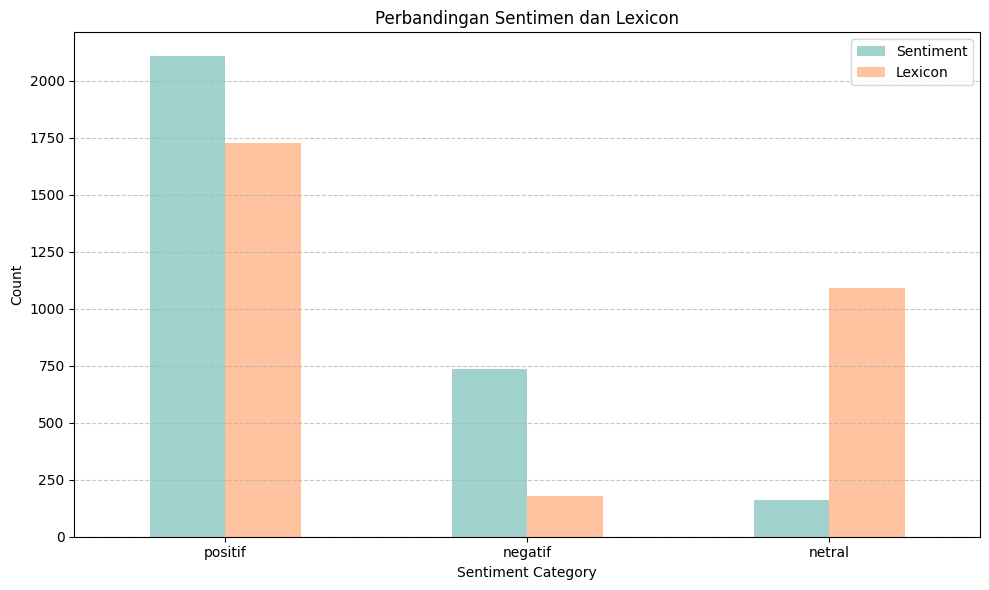

In [21]:
label_mapping = {
    'positive': 'positif',
    'negative': 'negatif',
    'neutral': 'netral'
}

sentiment_clean = (
    df['sentiment']
    .str.lower()
    .map(label_mapping)
)

sentiment_counts = sentiment_clean.value_counts()
lexicon_counts = df['lexicon'].value_counts()

categories = ['positif', 'negatif', 'netral']

comparison_df = pd.DataFrame({
    'Sentiment': sentiment_counts.reindex(categories, fill_value=0),
    'Lexicon': lexicon_counts.reindex(categories, fill_value=0)
})

comparison_df.plot(kind='bar', figsize=(10,6), color=['#A1D2CE', '#FFC3A0'])
plt.title('Perbandingan Sentimen dan Lexicon')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Hapus yg ga sinkron antara label dengan lexicon

In [22]:
def categorize_sentiment(score):
    if score in [4, 5]:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    elif score in [1, 2]:
        return 'Negative'

if 'sentiment' not in df.columns:
    df['sentiment'] = df['score'].apply(categorize_sentiment)

label_mapping_reverse = {
    'Positive': 'positif',
    'Negative': 'negatif',
    'Neutral': 'netral'
}

df['sentiment_mapped'] = df['sentiment'].map(label_mapping_reverse)

inconsistent_df = df[df['sentiment_mapped'] != df['lexicon']]

rows_removed = len(inconsistent_df)
print(f"Jumlah baris yang tidak sinkron dan akan dihapus: {rows_removed}")

df = df[df['sentiment_mapped'] == df['lexicon']].copy()

df = df.drop(columns=['sentiment_mapped'])

print("\nDataFrame setelah menghapus baris yang tidak sinkron:")
print(df.head())
print(f"Jumlah baris saat ini dalam df: {len(df)}")

df.to_csv("iqiyi_final.csv", index=False)
print("Dataset yang sudah diperbarui telah disimpan ke iqiyi_final.csv")

Jumlah baris yang tidak sinkron dan akan dihapus: 1207

DataFrame setelah menghapus baris yang tidak sinkron:
                               reviewId         userName  \
0  401686bc-bb77-459a-a383-c547f520611a  Pengguna Google   
1  ddb5f1cd-9a4e-4c1b-9a8f-969e30f8176e  Pengguna Google   
3  490a70cd-ac2a-46b8-a4ba-c601ee1fb940  Pengguna Google   
4  3e03efc7-6546-45e0-8bb2-b5e3fedc804e  Pengguna Google   
5  4b9a855e-6b4a-48ec-b796-ffc4788b8ddf  Pengguna Google   

                                             content  score  \
0  bagus tapi saya kurang puas dengan adanya yang...      4   
1                                              keren      5   
3  sukaa bangett sama drama' nya,apalagi iklannya...      5   
4                                             seru 👍      5   
5                                       bagus banget      5   

                    at                                   content_casefold  \
0  2025-12-28 09:45:49  bagus tapi saya kurang puas dengan adanya yang...

# Visualisasi After

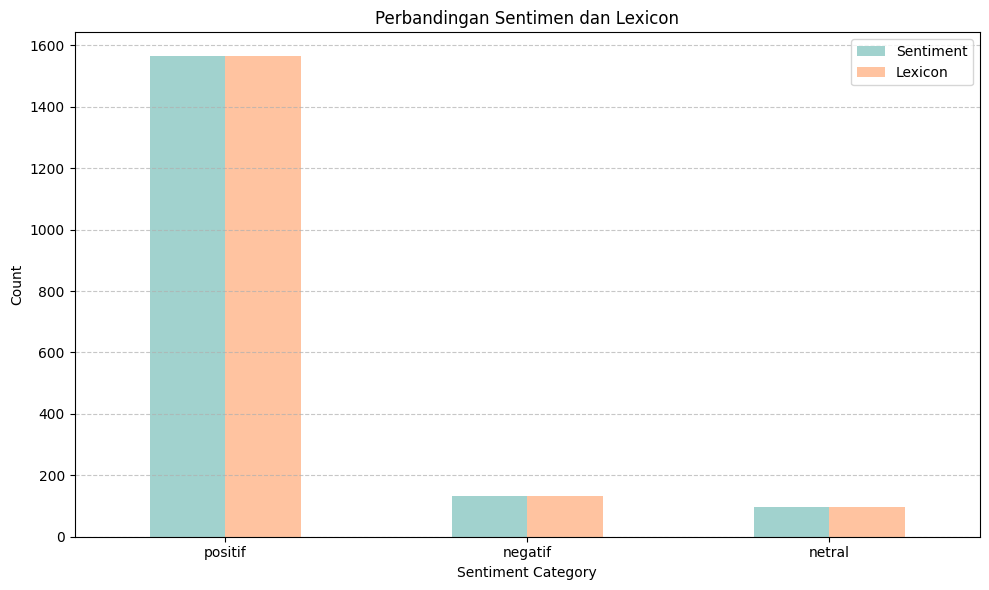

In [23]:
label_mapping = {
    'positive': 'positif',
    'negative': 'negatif',
    'neutral': 'netral'
}

sentiment_clean = (
    df['sentiment']
    .str.lower()
    .map(label_mapping)
)

sentiment_counts = sentiment_clean.value_counts()
lexicon_counts = df['lexicon'].value_counts()

categories = ['positif', 'negatif', 'netral']

comparison_df = pd.DataFrame({
    'Sentiment': sentiment_counts.reindex(categories, fill_value=0),
    'Lexicon': lexicon_counts.reindex(categories, fill_value=0)
})

comparison_df.plot(kind='bar', figsize=(10,6), color=['#A1D2CE', '#FFC3A0'])
plt.title('Perbandingan Sentimen dan Lexicon')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualisasi Word Cloud Positif, Netral, Negatif

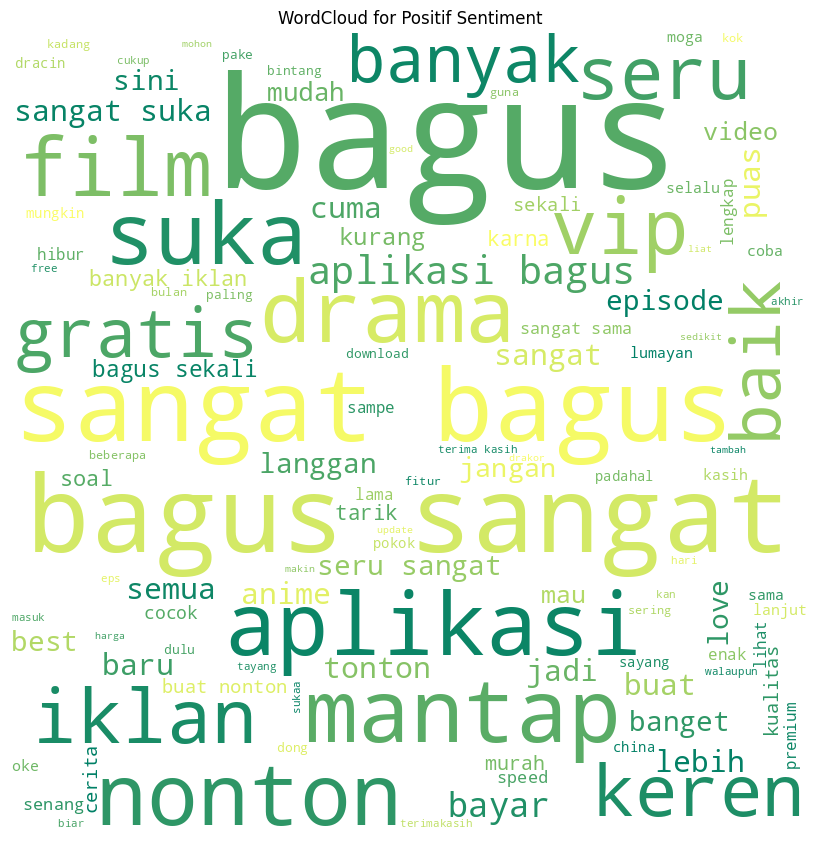

In [24]:
df_positive = df[df['lexicon'] == 'positif']

all_neutral_text = " ".join(df_positive['teks_clean'].fillna('').astype(str))

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white', colormap = 'summer',
                min_font_size = 10).generate(all_neutral_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('WordCloud for Positif Sentiment')
plt.show()

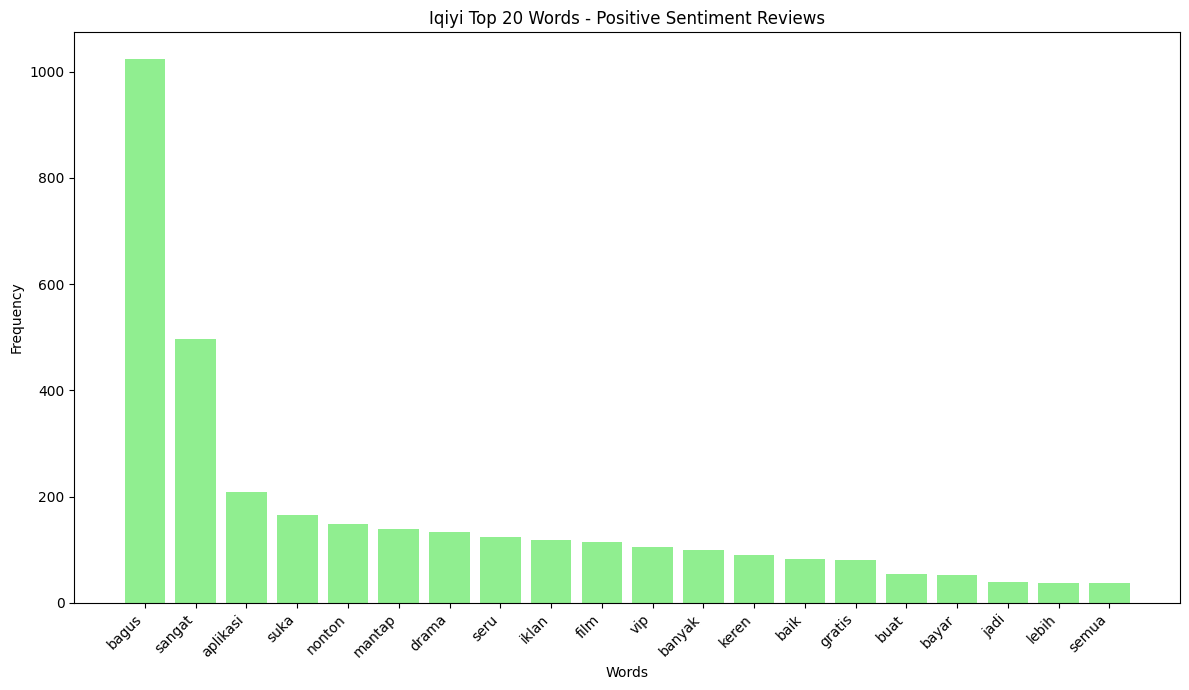

In [25]:
import collections
import matplotlib.pyplot as plt

df_positive_reviews = df[df['sentiment'] == 'Positive']

positive_words = []
for text in df_positive_reviews['teks_clean'].fillna('').astype(str):
    positive_words.extend(text.split())

word_counts = collections.Counter(positive_words)

top_20_words = word_counts.most_common(20)

words = [word for word, count in top_20_words]
counts = [count for word, count in top_20_words]

plt.figure(figsize=(12, 7))
plt.bar(words, counts, color='lightgreen')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Iqiyi Top 20 Words - Positive Sentiment Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

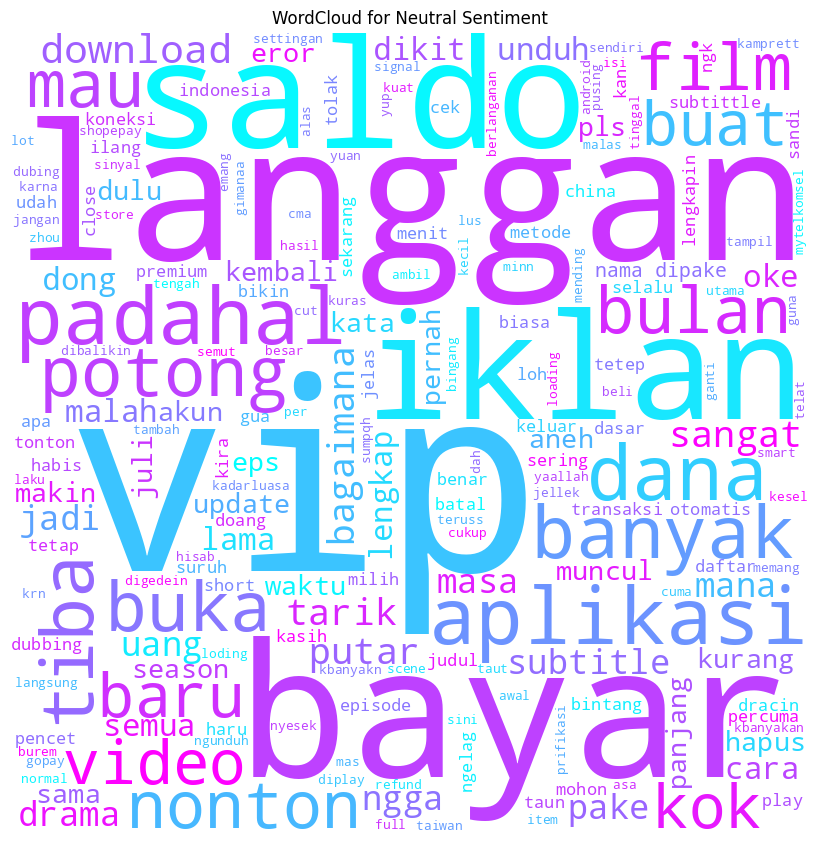

In [26]:
df_neutral = df[df['lexicon'] == 'netral']

all_neutral_text = " ".join(df_neutral['teks_clean'].fillna('').astype(str))

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white', colormap = 'cool',
                min_font_size = 10).generate(all_neutral_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('WordCloud for Neutral Sentiment')
plt.show()

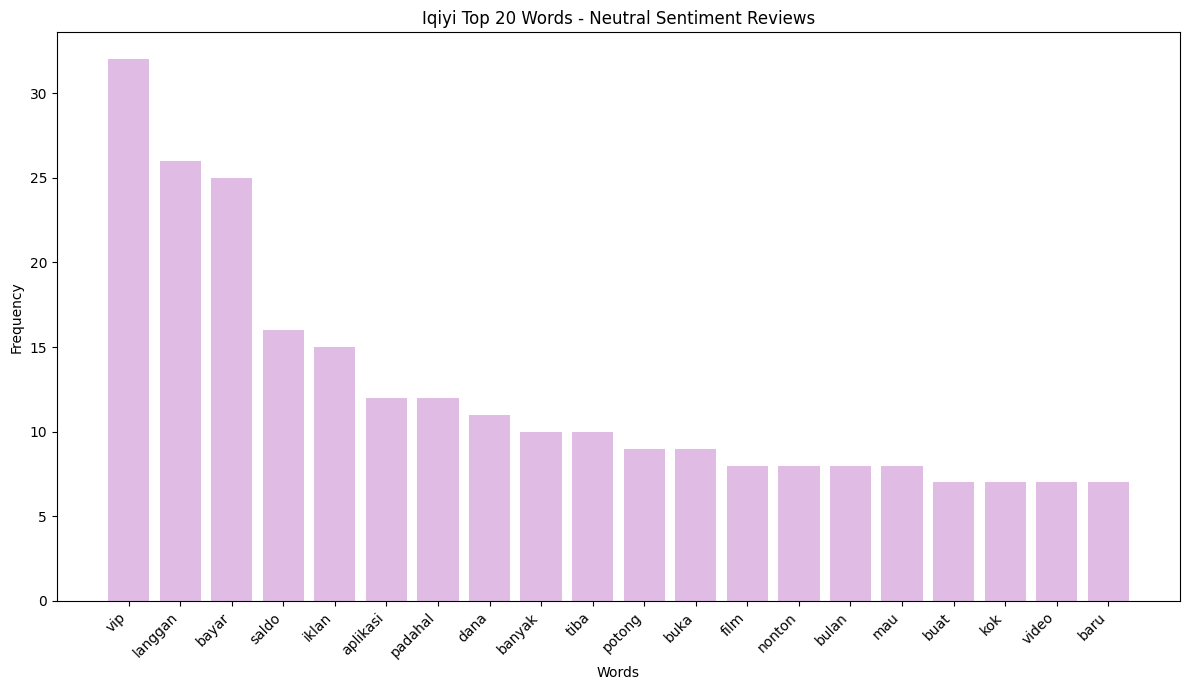

In [27]:
import collections
import matplotlib.pyplot as plt

df_neutral_reviews = df[df['sentiment'] == 'Neutral']

neutral_words = []
for text in df_neutral_reviews['teks_clean'].fillna('').astype(str):
    neutral_words.extend(text.split())

word_counts_neutral = collections.Counter(neutral_words)

top_20_neutral_words = word_counts_neutral.most_common(20)

words_neutral = [word for word, count in top_20_neutral_words]
counts_neutral = [count for word, count in top_20_neutral_words]

plt.figure(figsize=(12, 7))
plt.bar(words_neutral, counts_neutral, color='#E0BBE4')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Iqiyi Top 20 Words - Neutral Sentiment Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

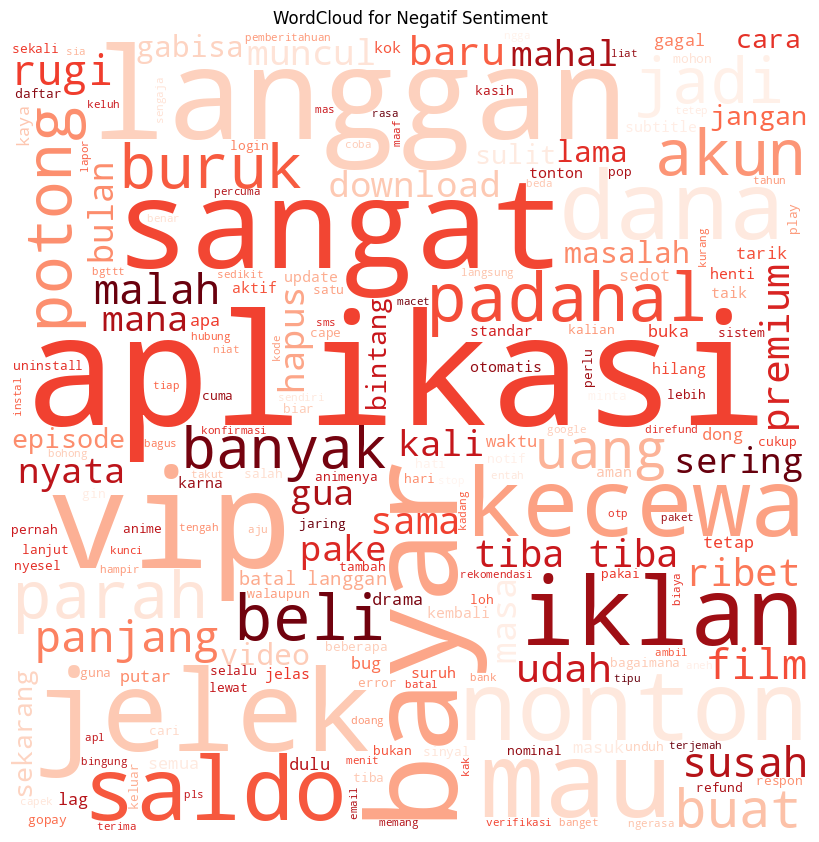

In [28]:
df_negative = df[df['lexicon'] == 'negatif']

all_neutral_text = " ".join(df_negative['teks_clean'].fillna('').astype(str))

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white', colormap = 'Reds_r',
                min_font_size = 10).generate(all_neutral_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('WordCloud for Negatif Sentiment')
plt.show()

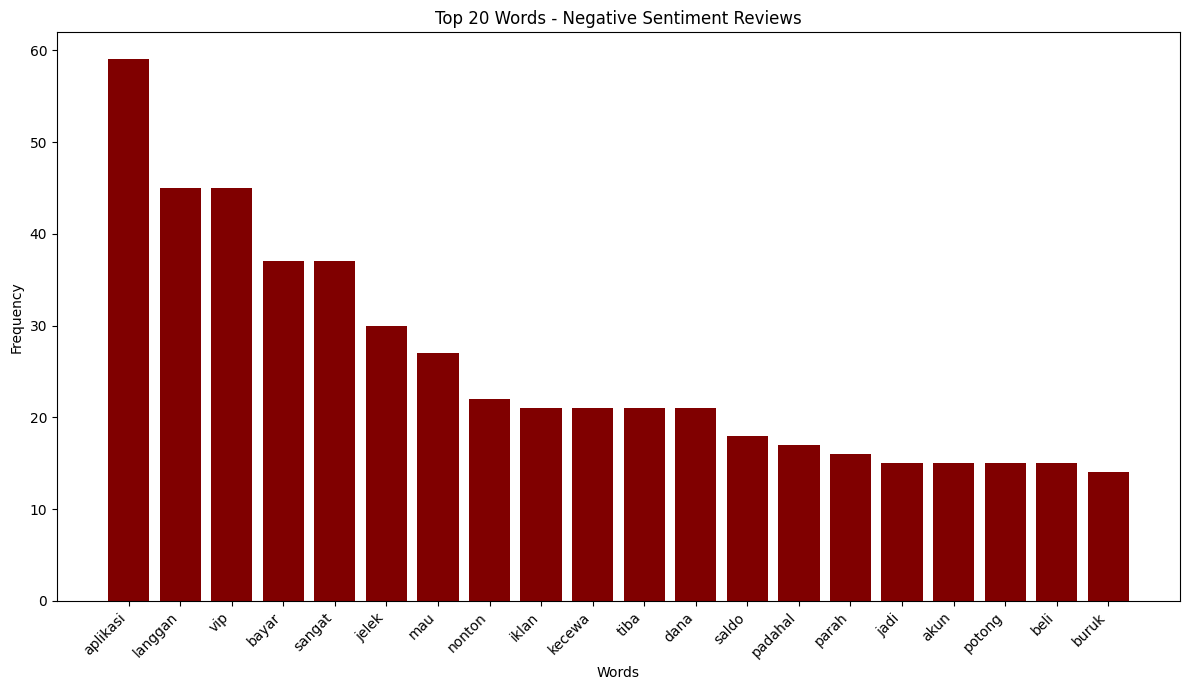

In [29]:
import collections
import matplotlib.pyplot as plt

df_negative_reviews = df[df['sentiment'] == 'Negative']

negative_words = []
for text in df_negative_reviews['teks_clean'].fillna('').astype(str):
    negative_words.extend(text.split())

word_counts_negative = collections.Counter(negative_words)

top_20_negative_words = word_counts_negative.most_common(20)

words_negative = [word for word, count in top_20_negative_words]
counts_negative = [count for word, count in top_20_negative_words]

plt.figure(figsize=(12, 7))
plt.bar(words_negative, counts_negative, color='maroon')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words - Negative Sentiment Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualisasi N-Gram

Generating plots for Positive Sentiment (Top 20 N-grams)...


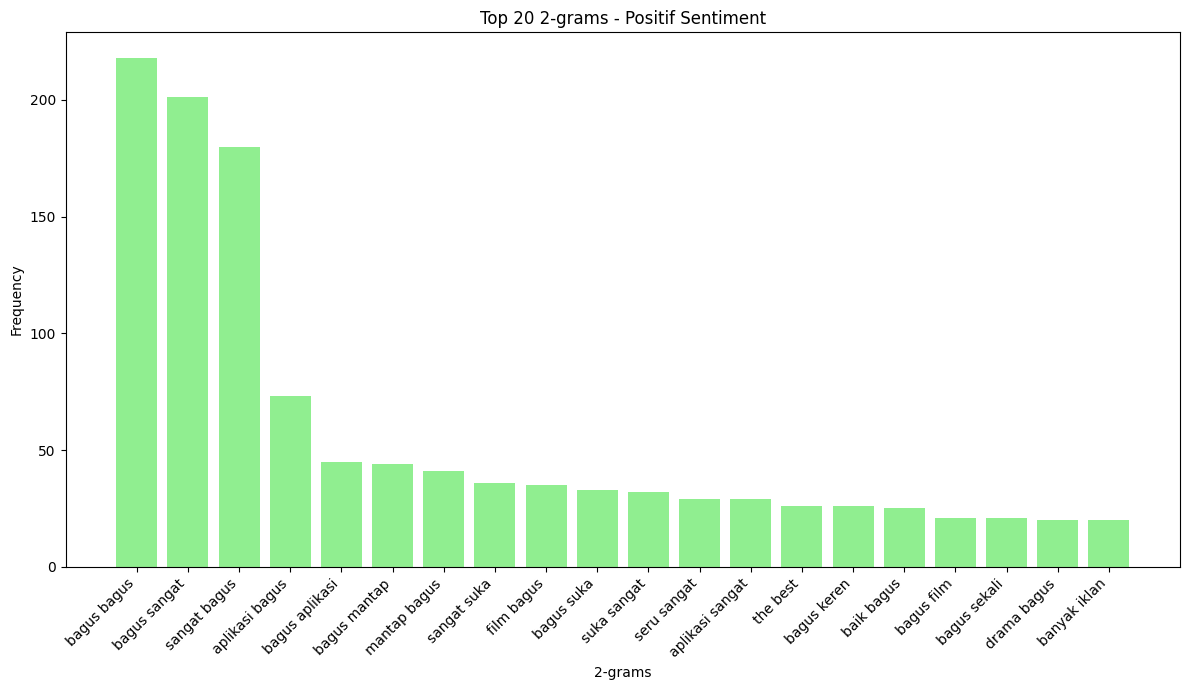

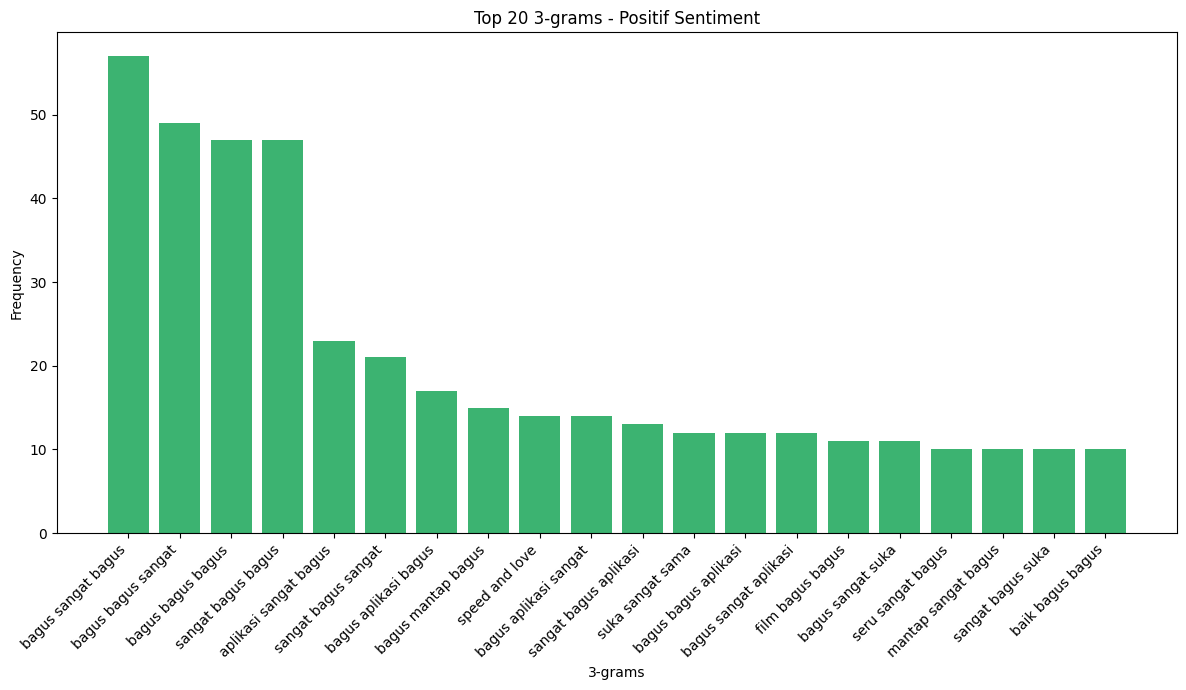

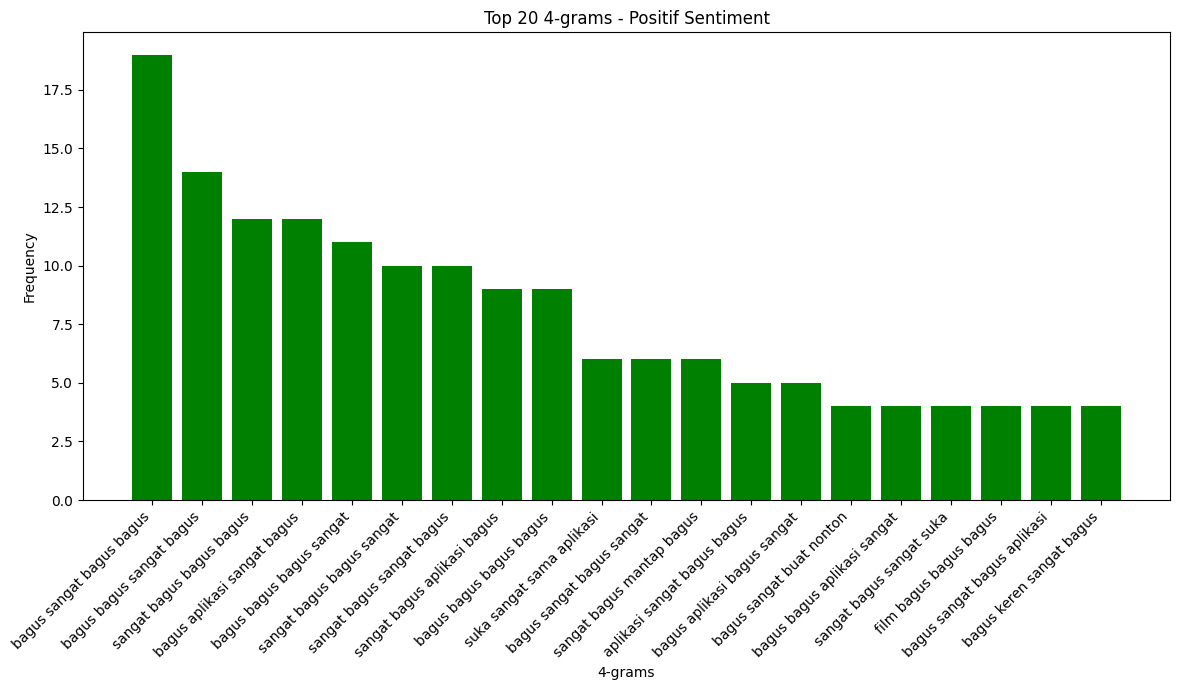

Generating plots for Neutral Sentiment (Top 20 N-grams)...


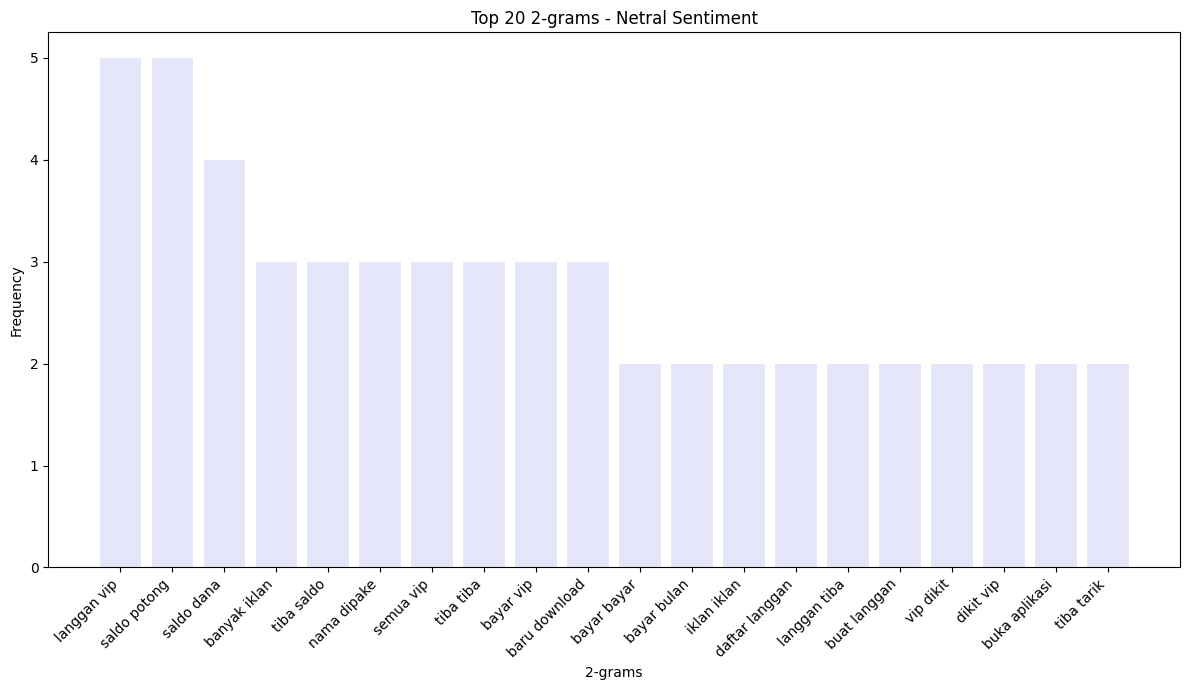

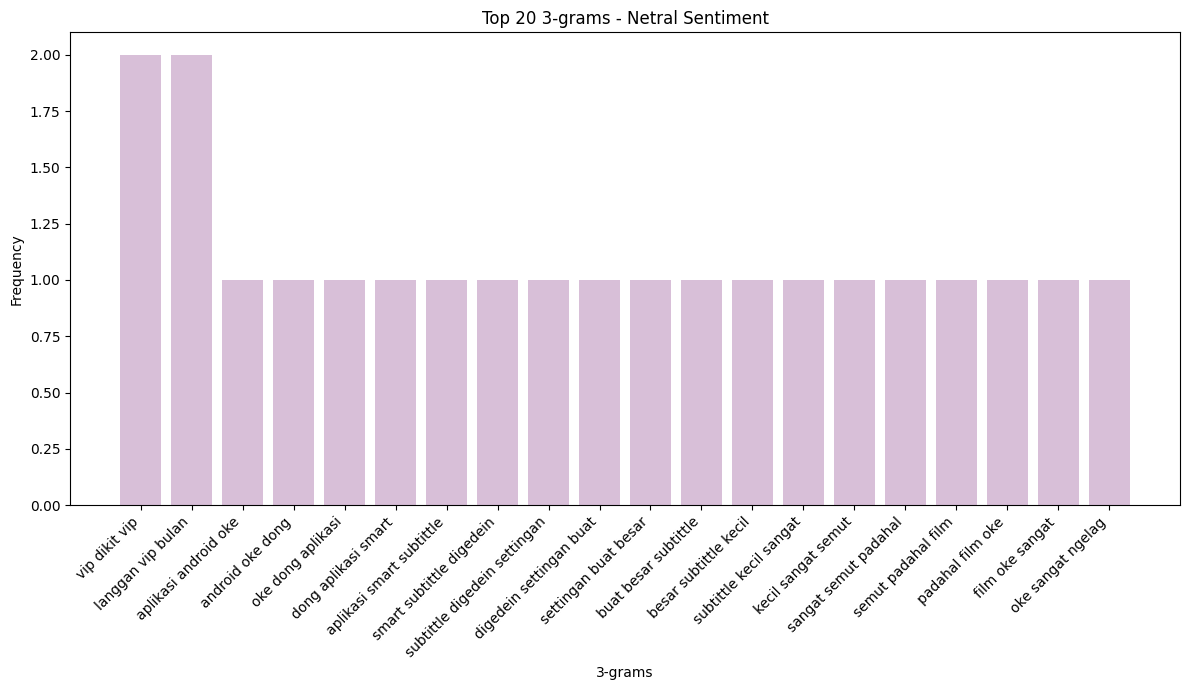

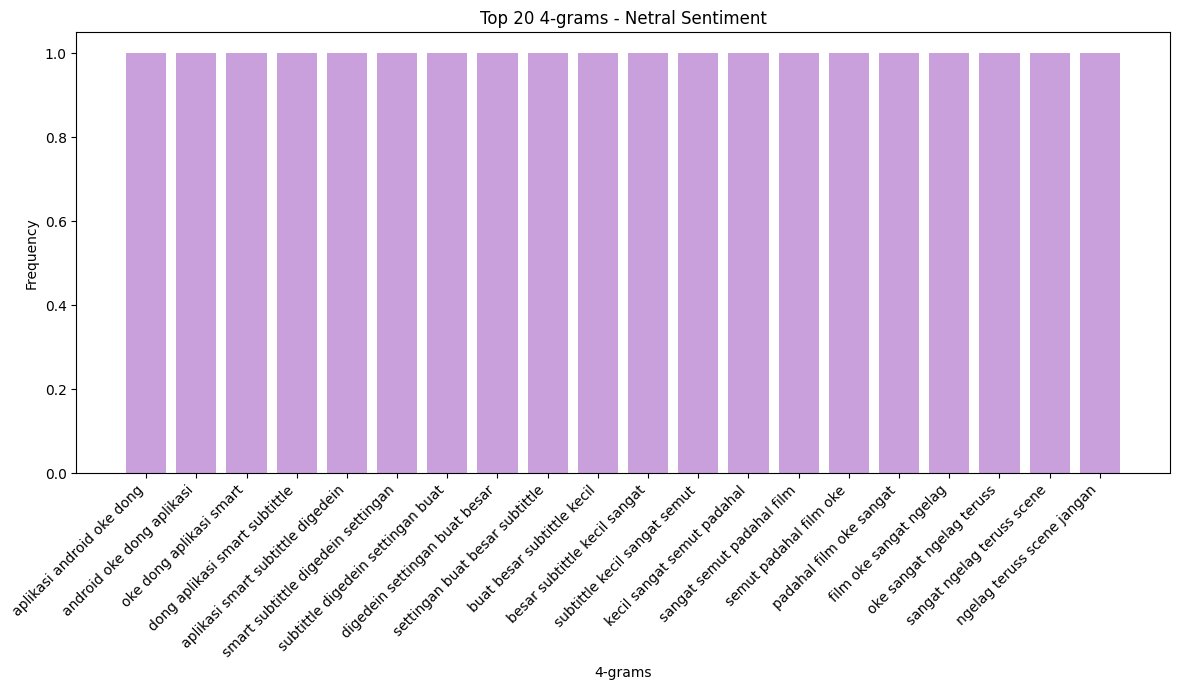

Generating plots for Negative Sentiment (Top 20 N-grams)...


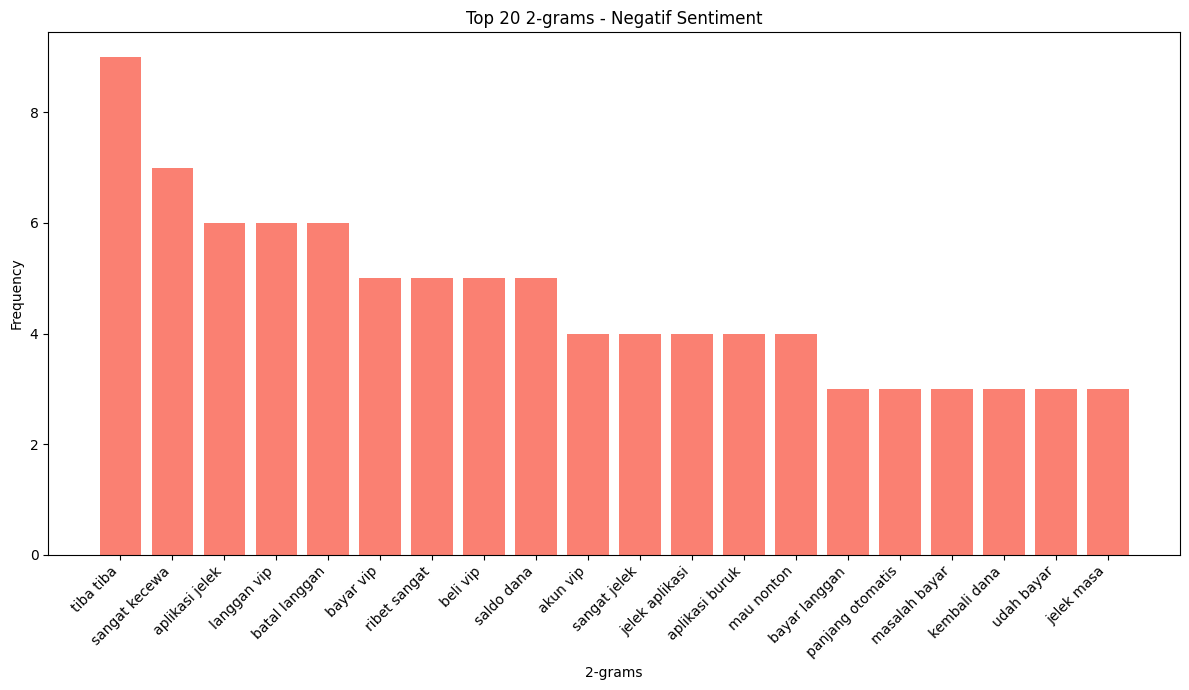

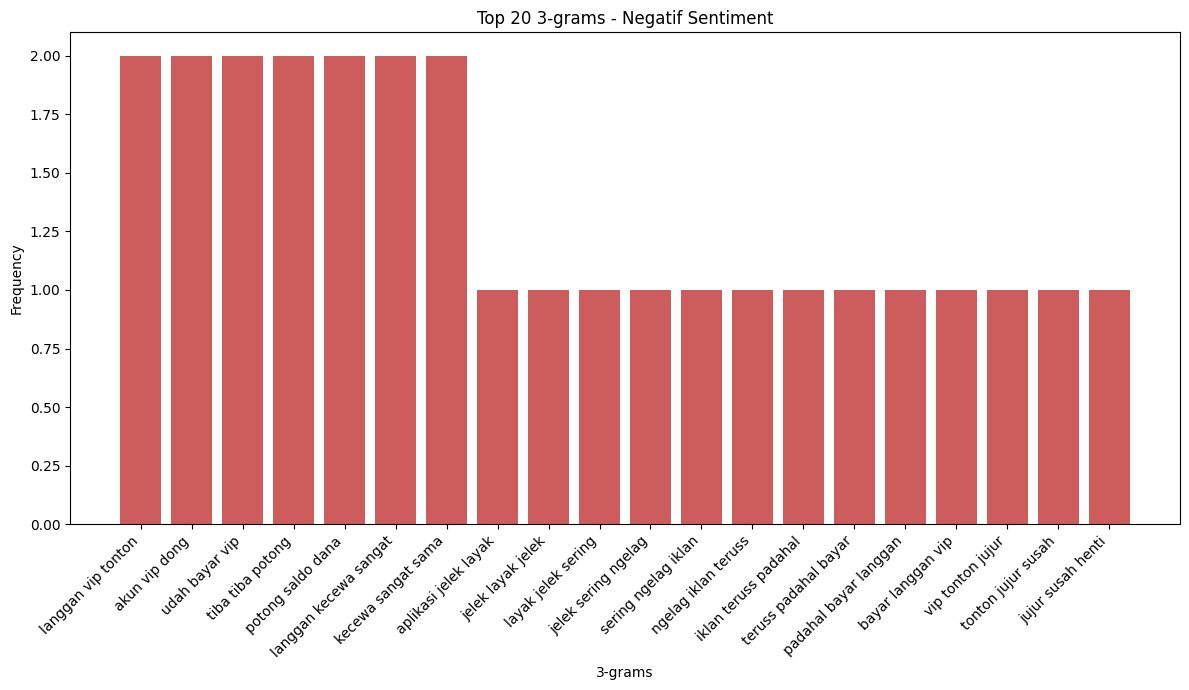

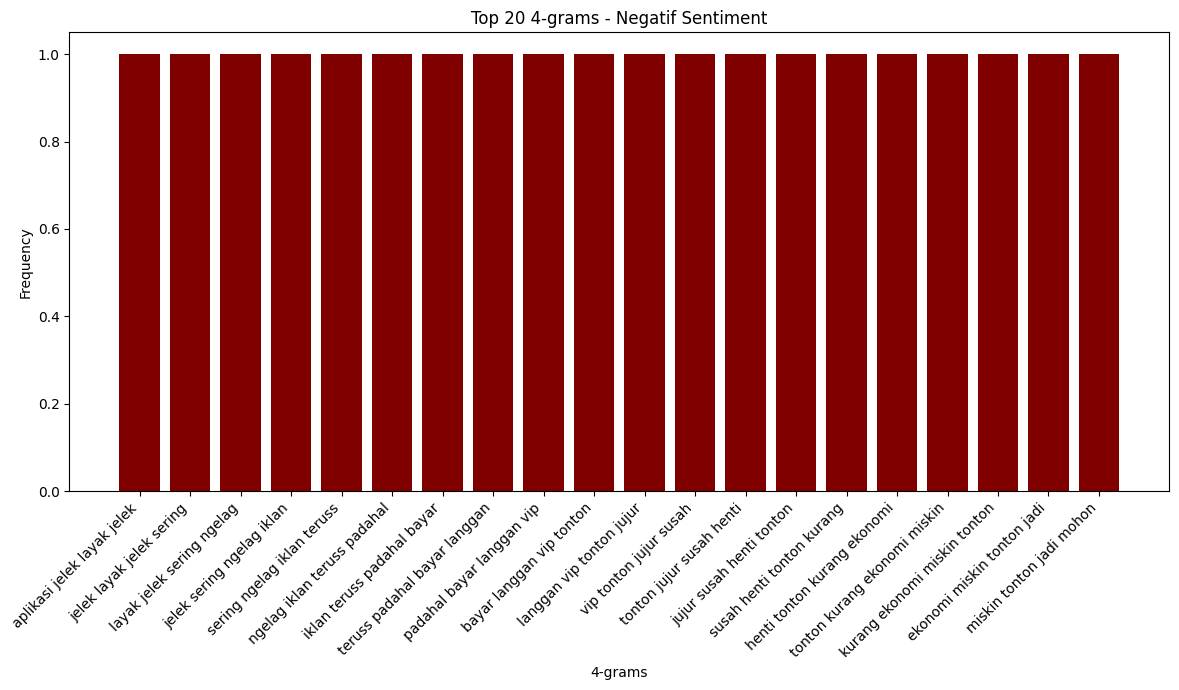

In [30]:
def generate_ngrams(text_list, n):
    all_words = []
    for text in text_list:
        if isinstance(text, str):
            all_words.extend(text.split())
    n_grams = nltk.ngrams(all_words, n)
    return Counter(n_grams)

def plot_ngrams_by_sentiment(ngram_data, n_value, sentiment_label, color, top_n=20):
    if not ngram_data:
        print(f"No {n_value}-grams to plot for {sentiment_label} sentiment.")
        return

    top_ngrams = ngram_data.most_common(top_n)

    words = [" ".join(ngram) for ngram, count in top_ngrams]
    counts = [count for ngram, count in top_ngrams]

    plt.figure(figsize=(12, 7))
    plt.bar(words, counts, color=color)
    plt.xlabel(f'{n_value}-grams')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} {n_value}-grams - {sentiment_label.capitalize()} Sentiment')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

df_positive_reviews = df[df['sentiment'] == 'Positive']
df_neutral_reviews = df[df['sentiment'] == 'Neutral']
df_negative_reviews = df[df['sentiment'] == 'Negative']


# Positive sentiment
all_positive_text_list = df_positive_reviews['teks_clean'].fillna('').astype(str).tolist()
positive_bigrams = generate_ngrams(all_positive_text_list, 2)
positive_trigrams = generate_ngrams(all_positive_text_list, 3)
positive_4grams = generate_ngrams(all_positive_text_list, 4)

# Neutral sentiment
all_neutral_text_list = df_neutral_reviews['teks_clean'].fillna('').astype(str).tolist()
neutral_bigrams = generate_ngrams(all_neutral_text_list, 2)
neutral_trigrams = generate_ngrams(all_neutral_text_list, 3)
neutral_4grams = generate_ngrams(all_neutral_text_list, 4)

# Negative sentiment
all_negative_text_list = df_negative_reviews['teks_clean'].fillna('').astype(str).tolist()
negative_bigrams = generate_ngrams(all_negative_text_list, 2)
negative_trigrams = generate_ngrams(all_negative_text_list, 3)
negative_4grams = generate_ngrams(all_negative_text_list, 4)

print("Generating plots for Positive Sentiment (Top 20 N-grams)...")
plot_ngrams_by_sentiment(positive_bigrams, 2, 'positif', 'lightgreen', top_n=20)
plot_ngrams_by_sentiment(positive_trigrams, 3, 'positif', 'mediumseagreen', top_n=20)
plot_ngrams_by_sentiment(positive_4grams, 4, 'positif', 'green', top_n=20)

print("Generating plots for Neutral Sentiment (Top 20 N-grams)...")
plot_ngrams_by_sentiment(neutral_bigrams, 2, 'netral', '#E6E6FA', top_n=20)
plot_ngrams_by_sentiment(neutral_trigrams, 3, 'netral', '#D8BFD8', top_n=20)
plot_ngrams_by_sentiment(neutral_4grams, 4, 'netral', '#C9A0DC', top_n=20)

print("Generating plots for Negative Sentiment (Top 20 N-grams)...")
plot_ngrams_by_sentiment(negative_bigrams, 2, 'negatif', 'salmon', top_n=20)
plot_ngrams_by_sentiment(negative_trigrams, 3, 'negatif', 'indianred', top_n=20)
plot_ngrams_by_sentiment(negative_4grams, 4, 'negatif', 'maroon', top_n=20)

# Splitting Data 80:20

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['teks_clean'])

y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1434, 1571)
Shape of X_test: (359, 1571)
Shape of y_train: (1434,)
Shape of y_test: (359,)


# TF-IDF

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

X = tfidf_vectorizer.fit_transform(df['teks_clean'])

df_tfidf = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("Shape of TF-IDF features (X):")
print(X.shape)
print("First 5 rows of df_tfidf (optional for inspection):")
print(df_tfidf.head())

Shape of TF-IDF features (X):
(1793, 1571)
First 5 rows of df_tfidf (optional for inspection):
   aaach  abis  abistuu  access  account  actingnya       ada  adain  admin  \
0    0.0   0.0      0.0     0.0      0.0        0.0  0.692632    0.0    0.0   
1    0.0   0.0      0.0     0.0      0.0        0.0  0.000000    0.0    0.0   
2    0.0   0.0      0.0     0.0      0.0        0.0  0.000000    0.0    0.0   
3    0.0   0.0      0.0     0.0      0.0        0.0  0.000000    0.0    0.0   
4    0.0   0.0      0.0     0.0      0.0        0.0  0.000000    0.0    0.0   

   aduh  ...  yoo  you  youtube  youuuu  yuan  yuhang  yup  yutub  zhang  zhou  
0   0.0  ...  0.0  0.0      0.0     0.0   0.0     0.0  0.0    0.0    0.0   0.0  
1   0.0  ...  0.0  0.0      0.0     0.0   0.0     0.0  0.0    0.0    0.0   0.0  
2   0.0  ...  0.0  0.0      0.0     0.0   0.0     0.0  0.0    0.0    0.0   0.0  
3   0.0  ...  0.0  0.0      0.0     0.0   0.0     0.0  0.0    0.0    0.0   0.0  
4   0.0  ...  0.0  0.0   

# Pembuatan Model NB

In [33]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train, y_train)

print("Multinomial Naive Bayes model trained successfully.")

Multinomial Naive Bayes model trained successfully.


# Evaliasi Model

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("\n--- Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


--- Model Evaluation ---
Accuracy: 0.9080779944289693

Classification Report:
               precision    recall  f1-score   support

    Negative       0.89      0.28      0.42        29
     Neutral       0.00      0.00      0.00        12
    Positive       0.91      1.00      0.95       318

    accuracy                           0.91       359
   macro avg       0.60      0.43      0.46       359
weighted avg       0.88      0.91      0.88       359


Confusion Matrix:
 [[  8   0  21]
 [  1   0  11]
 [  0   0 318]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
df['sentiment_model_prediction'] = model.predict(X)

print("Sentiment predictions using the ML model added to the DataFrame.")
print(df[['content', 'sentiment', 'sentiment_model_prediction']].head())

Sentiment predictions using the ML model added to the DataFrame.
                                             content sentiment  \
0  bagus tapi saya kurang puas dengan adanya yang...  Positive   
1                                              keren  Positive   
3  sukaa bangett sama drama' nya,apalagi iklannya...  Positive   
4                                             seru 👍  Positive   
5                                       bagus banget  Positive   

  sentiment_model_prediction  
0                   Positive  
1                   Positive  
3                   Positive  
4                   Positive  
5                   Positive  


# Visualiasai Perbandingan Model x Lexicon

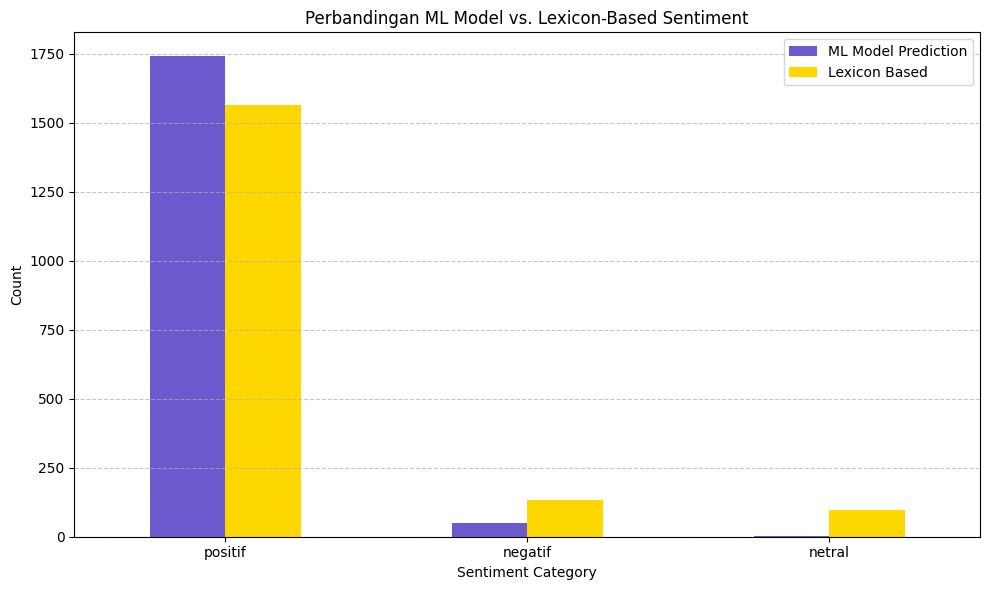

In [36]:
import matplotlib.pyplot as plt

label_mapping_reverse = {
    'Positive': 'positif',
    'Negative': 'negatif',
    'Neutral': 'netral'
}
df['sentiment_model_prediction_mapped'] = df['sentiment_model_prediction'].map(label_mapping_reverse)

ml_model_counts = df['sentiment_model_prediction_mapped'].value_counts()
lexicon_counts = df['lexicon'].value_counts()

categories = ['positif', 'negatif', 'netral']
comparison_ml_lexicon_df = pd.DataFrame({
    'ML Model Prediction': ml_model_counts.reindex(categories, fill_value=0),
    'Lexicon Based': lexicon_counts.reindex(categories, fill_value=0)
})

comparison_ml_lexicon_df.plot(kind='bar', figsize=(10, 6), color=['#6A5ACD', '#FFD700'])
plt.title('Perbandingan ML Model vs. Lexicon-Based Sentiment')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()